グラフ理論の基礎
=============
```{epigraph}
数学とは、異なるものを同じと見なす技術である

-- 数学者･ジュール＝アンリ・ポアンカレ
```

身の回りには、さまざまな「つながり」が存在しています。  
友達関係、道路網、インターネット、電気回路、分子構造などなど。  
これらは一見異なるものに見えますが、実は同じ数学的構造で表現できます。  
それが**グラフ**です。

グラフは、ノードとエッジ（頂点と辺）という構造で対象を抽象化しています。  
何をノードとエッジとして捉えるかによって、様々な対象を同一のグラフとして扱うことができます。

グラフの例としては

- Twitterのフォロー・フォロワー関係
- 辞書における単語間の関係
- Webページのリンク構造
- 交通網

などがあります。

ノードを分析するだけでなく、つながりの構造を分析することでより多くの情報を得られます。  
例えば、Googleの検索エンジンはページ間のつながりの構造に基づいて作られたPageRankアルゴリズムを使っています。

グラフを分析すれば、

- 人間関係での中心人物は誰か
- グラフにおける自然なグループ分け

などを見つけられます。

これにより、

- SNSでの偽情報の伝搬を遅らせたり、災害情報を素早く伝えたりする方法
- 似たような構造を持った新たな薬の開発
- 購買情報から、その人に合った製品の推薦

といったことが可能になります。

分析だけでも有用ですが、その結果を用いて未来を予測したり、新しいものを生成したりすることが、グラフ理論の重要な応用分野となっています。

## グラフの作成

それでは、Pythonでグラフを作り、操作してみましょう。
ここでは、NetworkXというライブラリを使ってグラフを作ります。

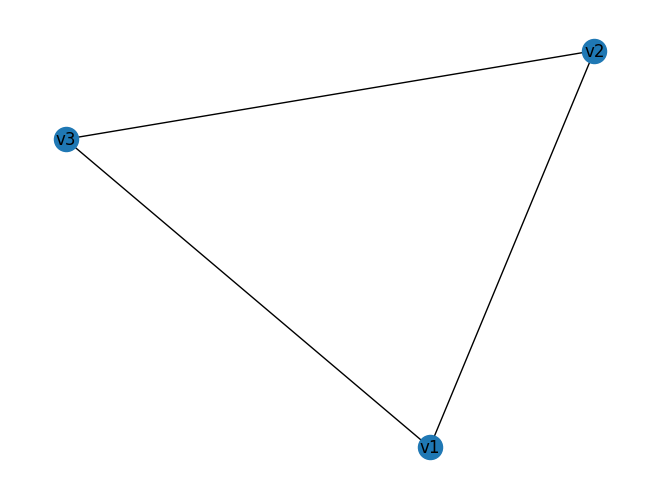

In [1]:
import networkx as nx

G = nx.Graph()

G.add_node('v1')
G.add_nodes_from(['v2', 'v3'])

G.add_edge('v1', 'v2')
G.add_edges_from([('v2', 'v3'), ('v1', 'v3')])

nx.draw(G, with_labels=True)

このプログラムでは、グラフを作成し表示しています。
3行目で操作の対象となるグラフを作っています。
これは**無向グラフ**といって、ノード間のエッジに向きがないタイプのグラフです。
この時点では、このグラフにノードもエッジも存在しません。

向きがあるタイプのグラフは**有向グラフ**といい、`nx.DiGraph()`を使うと作成できます。
あとで、プログラムを変更して確認すると良いでしょう。

5行目はv1という名前のノードを1つ追加しています。
6行目ではv2とv3という名前のノードを一度に追加します。
このように複数のノードをまとめて追加するときは、リストを使います。

8行目はv1とv2にエッジを追加しています。これで2つのノードがつながります。
9行目は複数のエッジを一度に追加します。
つなげるエッジをリストで渡し、一度に追加しています。

11行目は作成したグラフを表示しています。

## 中心性指標

グラフを分析するとき、**どのノードが最も重要か**という問いは重要です。

私たちは日常的に「中心にあるものが重要だ」と考えがちですが、
グラフ理論では単なる2次元の図形ではなく、ノードとエッジからなる抽象的な構造を扱います。
そのため「中心」や「重要性」を明確に定義する必要があります。

以下に、グラフ理論で使われる代表的な中心性指標を挙げます。

1. **次数中心性（Degree Centrality）**
   - 単純に「多くのノードとつながっているノード」を重要とみなします
   - たくさんの友達がいる人が社会的に影響力があるという考え方に似ています

2. **近接中心性（Closeness Centrality）**
   - 「他のすべてのノードに短い距離で到達できるノード」を重要とみなします
   - 情報が素早く広がる位置にいる人が重要という考え方です

3. **媒介中心性（Betweenness Centrality）**
   - 「多くの最短経路上に位置するノード」を重要とみなします
   - このノードがなければ多くの経路が分断されてしまうため、情報の橋渡し役として重要です

4. **固有ベクトル中心性（Eigenvector Centrality）**
   - 「重要なノードとつながっているノード」を重要とみなします
   - 影響力のある人とつながっている人も影響力があるという考え方です

これらの指標を状況によって使い分けることで、ネットワーク内の重要なノードを様々な観点から特定できます。

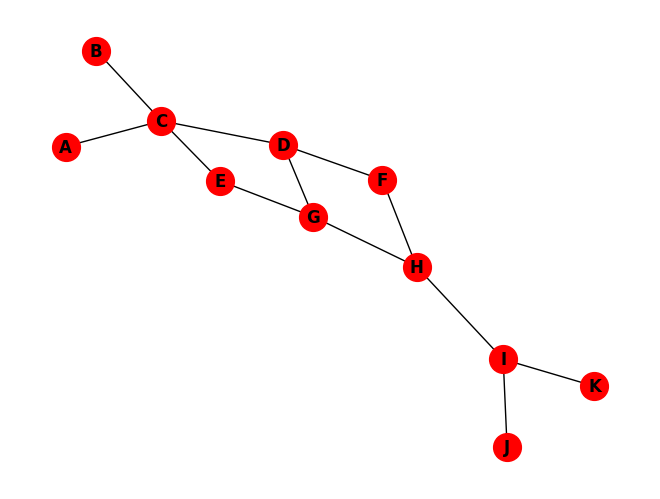

In [2]:
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"])
G.add_edges_from([("A", "C"), ("B", "C"), ("C", "D"), ("C", "E"), ("D", "F"), ("D", "G"), ("E", "G"), ("F", "H"), ("G", "H"), ("H", "I"), ("I", "J"), ("I", "K")])

pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_size=400, node_color='red', with_labels=True, font_weight='bold')

このグラフを使って、それぞれの中心性を求めてみましょう。
それぞれの中心性を求める関数がNetworkXにはあります。

In [3]:
c0 = nx.degree_centrality(G)
c1 = nx.closeness_centrality(G)
c2 = nx.betweenness_centrality(G)
c3 = nx.eigenvector_centrality(G)

print(sorted(c0.items(), key=lambda x: -x[1])[0])
print(sorted(c1.items(), key=lambda x: -x[1])[0])
print(sorted(c2.items(), key=lambda x: -x[1])[0])
print(sorted(c3.items(), key=lambda x: -x[1])[0])

('C', 0.4)
('G', 0.47619047619047616)
('H', 0.4851851851851853)
('D', 0.44652903790391724)


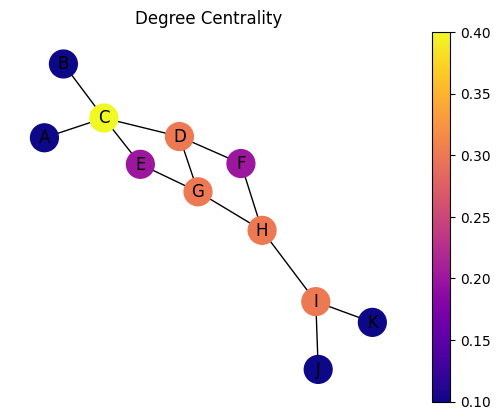

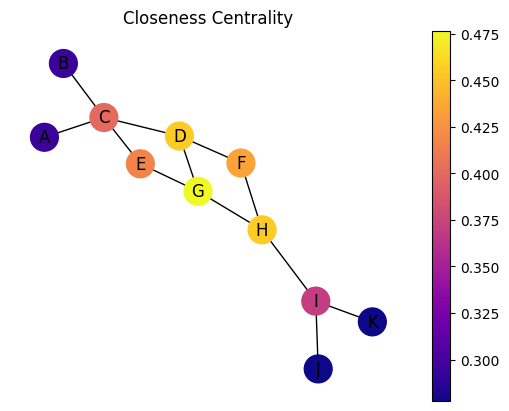

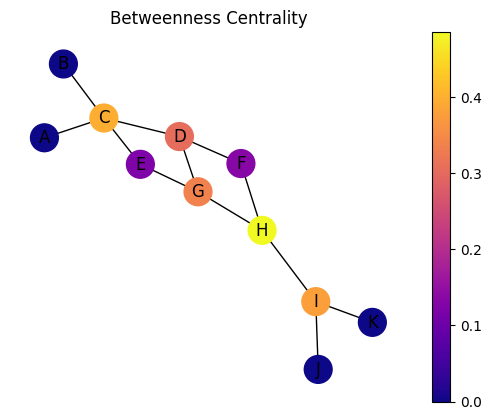

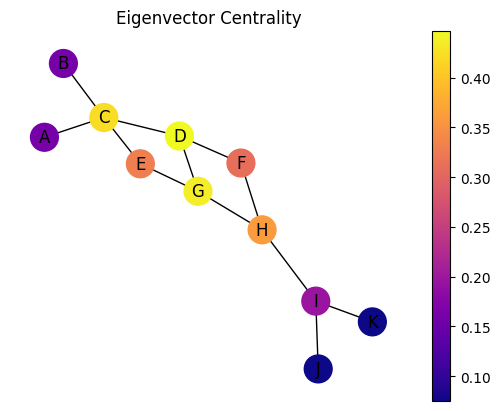

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def draw_color(G, pos, measures, name):    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=400, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

draw_color(G, pos, c0, 'Degree Centrality')
draw_color(G, pos, c1, 'Closeness Centrality')
draw_color(G, pos, c2, 'Betweenness Centrality')
draw_color(G, pos, c3, 'Eigenvector Centrality')

## 特徴量

グラフ構造を数値的に捉えるために使われる指標を**特徴量**と呼びます。
これらの特徴量は、グラフの比較・分類や振る舞いの理解に不可欠です。

以下に代表的な特徴量を紹介します。

- **次数（Degree）**
   - あるノードに直接つながっているエッジの数
   - 例：SNSでの友達の数

- **次数分布（Degree Distribution）**
   - グラフ全体における各ノードの次数の分布
   - 多くの実世界のネットワークではべき乗則に従うことが知られています

- **最短経路長（Shortest Path Length）**
   - 2つのノード間を結ぶ最も短い道のりのエッジ数
   - ネットワーク内での情報伝達の効率性を表します

- **平均経路長・直径（Average Path Length/Diameter）**
   - すべてのノードペア間の最短経路長の平均値
   - 小さいほど「小さな世界」的なネットワークであることを示します

- **次数相関（Degree Correlation）**
   - あるノードの次数と、その隣接ノードの次数との関係性
   - 正の相関：高次数ノード同士がつながりやすい（同類交友）
   - 負の相関：高次数ノードは低次数ノードとつながりやすい（異類交友）

- **クラスタ係数（Clustering Coefficient）**
   - あるノードの隣接ノード同士がどれだけつながっているかを表す指標
   - 数式：$C_{i} = \frac{E_{i}}{\frac{k_i(k_i - 1)}{2}}$
     - $E_{i}$：ノード$i$の隣接ノード間のエッジ数
     - $k_i$：ノード$i$の次数
   - 直感的には「友達同士も友達である確率」
   - 高いクラスタ係数は「濃いコミュニティ」の存在を示唆します

これらの特徴量を組み合わせることで、複雑なグラフ構造を定量的に把握し、様々なネットワークの特性を比較できます。

<BarContainer object of 5 artists>

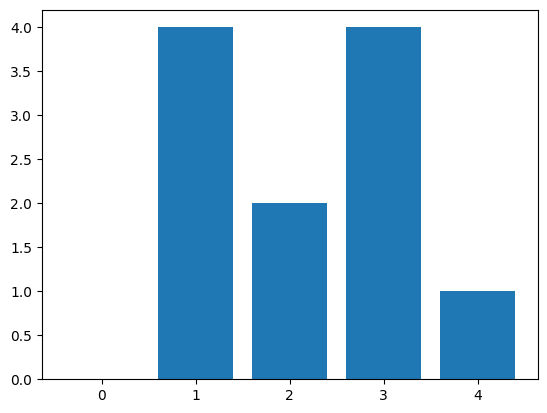

In [5]:
high = nx.degree_histogram(G)
plt.bar(range(len(high)), high)

In [6]:
# 最短経路
print(nx.shortest_path(G, source='A', target='I'))

# 平均経路長
print(nx.average_shortest_path_length(G))

# 次数相関
print(nx.degree_assortativity_coefficient(G))

# クラスタ係数
print(nx.average_clustering(G))

['A', 'C', 'D', 'F', 'H', 'I']
2.7636363636363637
-0.5937499999999997
0.0
